In [22]:
# calculate change of GF over the next timestep 
# with concentrations GF and E at the current one
def d_GF(GF_t, E_t, EGF_t):
    # first forth
    d_GF = -k_1*GF_t*E_t*d_t
    # first back
    d_GF += +k_1_back*EGF_t*d_t
    return d_GF

# calculate change of E over the next timestep 
# with concentrations GF, EF, EGF, E, and F at the current one
def d_E(EF_t, GF_t, EGF_t, E_t, F_t):
    # first forth
    d_E = -k_1*E_t*GF_t*d_t
    # first back
    d_E += +k_1_back*EGF_t*d_t
    # third forth (assuming water excess)
    d_E += +k_3*EF_t*d_t
    # third forth
    d_E += -k_3_back*E_t*F_t*d_t
    return d_E


# calculate change of EGF over the next timestep 
# with concentrations GF, E, and EGF at the current one
def d_EGF(GF_t, E_t, EGF_t):
    # first forth
    d_EGF = +k_1*E_t*GF_t*d_t
    # first back
    d_EGF += -k_1_back*EGF_t*d_t
    # second
    d_EGF += -k_2*EGF_t*d_t # OBS PW positive?
    return d_EGF

# calculate change of EF over the next timestep 
# with concentrations EGF, E, F, and EF at the current one
def d_EF(EGF_t, EF_t, E_t, F_t):
    # second
    d_EF = +k_2*EGF_t*d_t
    # third forth (assuming water excess)
    d_EF += -k_3*EF_t*d_t
    # third back
    d_EF += k_3_back*E_t*F_t*d_t # OBS PW missing
    return d_EF

# calculate change of G over the next timestep 
# with concentrations EGF at the current one
def d_G(EGF_t):
    # second
    d_G = k_2*EGF_t*d_t
    return d_G

# calculate change of F over the next timestep 
# with concentrations EF, E, and F at the current one
def d_F(EF_t, E_t, F_t):
    # third forth (assuming water excess)
    d_F = +k_3*EF_t*d_t
    # third forth
    d_F += -k_3_back*E_t*F_t*d_t  # OBS PW without F_T
    return d_F

In [29]:
# Constants
k_1 = 6000000 # M^-1s^-1
k_1_back = 8000 # s^-1
k_2 = 40 # s^-1
k_3 = 6 # s^-1
k_3_back = 1 #1 # s^-1

# Variables
GF_0 = 0.001 # M
E_0 = 0.000001 # muM
d_t = 0.0001 # s
end_t = 60 # s

In [30]:
# Initialize starting conditions
GF_t = GF_0
E_t = E_0
EGF_t = 0
EF_t = 0
G_t = 0
F_t = 0

# Initialize arrays for storing
GF = [GF_t]
E = [E_t]
EGF = [EGF_t]
EF = [EF_t]
G = [G_t]
F = [F_t]
t = [0]

no_steps = int(end_t/d_t)+1

# Do "reaction" step by step
for step in range(no_steps):
    time = step*d_t

    # Calculate new concentration after timestep
    GF_new  = GF_t  + d_GF(GF_t, E_t, EGF_t)
    EGF_new = EGF_t + d_EGF(GF_t, E_t, EGF_t)
    EF_new  = EF_t  + d_EF(EGF_t, EF_t, E_t, F_t)
    G_new   = G_t   + d_G(EGF_t)
    E_new   = E_t   + d_E(EF_t, GF_t, EGF_t, E_t, F_t)
    F_new   = F_t   + d_F(EF_t, E_t, F_t)
    
    #for name, old, diff, new in [("GF", GF_t,  d_GF(GF_t, E_t, EGF_t), GF_new),
    #                             ("E", GF_t,  d_E(EF_t, GF_t, EGF_t, E_t, F_t), E_new),
    #                       ("EGF", EGF_t, d_EGF(GF_t, E_t, EGF_t), EGF_new),
    #                      ]:
    #    print("%s\t%1.5f\t%1.5f\t%1.5f" % (name, old, diff, new))
        
    
    GF_t = GF_new
    EGF_t = EGF_new
    EF_t = EF_new
    G_t = G_new
    E_t = E_new
    F_t = F_new

    
    GF.append(GF_t)
    EGF.append(EGF_t)
    EF.append(EF_t)
    G.append(G_t)
    E.append(E_t)
    F.append(F_t)
    t.append(time)
    
print("I am done!")

I am done!


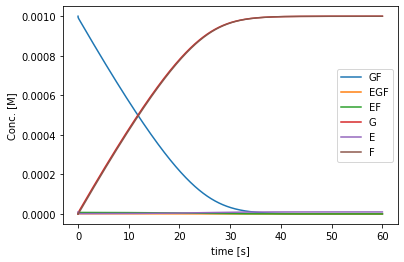

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

# Plot results
plt.plot(t, GF, label="GF")
plt.plot(t, EGF, label="EGF")
plt.plot(t, EF, label="EF")
plt.plot(t, G, label="G")
plt.plot(t, E, label="E")
plt.plot(t, F, label="F")
plt.legend()
plt.ylabel("Conc. [M]")
plt.xlabel("time [s]")
plt.show()
